In [1]:
###################### قسمت اول <<< فراخوانی و نامگذاری #############################
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
d=pd.read_excel(r"C:\Users\Digiyazd.com\Desktop\p-p1\python_project\report.xlsx")

d.columns=["r","date","time","p","p_lastyear","p_reserve","p_industries","p_renewable","freq_avg"]

d["p_reserve"]=d["p_reserve"].str.replace(",","").astype(int)
d["p_industries"]=d["p_industries"].str.replace(",","").astype(int)

print(d)

         r        date   time        p  p_lastyear  p_reserve  p_industries  \
0        1  1400/10/30  18:17  39463.0     39188.0        970          5049   
1        2  1400/10/30  12:01  37789.0     37127.0        578          4960   
2        3  1400/10/29  18:03  40682.0     39361.0       1067          4900   
3        4  1400/10/29  11:47  38513.0     37507.0        725          4437   
4        5  1400/10/28  18:01  40675.0     37373.0        609          4579   
...    ...         ...    ...      ...         ...        ...           ...   
3485  3486  1396/01/02  12:09  22818.0         NaN       4740          3599   
3486  3487  1396/01/01  19:53  26416.0         NaN       3140          3639   
3487  3488  1396/01/01  12:26  22068.0         NaN       4690          3632   
3488  3489  1395/12/30  19:53  26639.0         NaN       5671          3908   
3489  3490  1395/12/30  11:56  25587.0         NaN       4859          3891   

      p_renewable  freq_avg  
0            4461    

In [2]:
######################### قسمت دوم <<< پاکسازی متغیر های تاریخ و زمان #######################
import numpy as np
d.insert(2,"y",d["date"].str[0:4].astype(int))
d.insert(3,"m",d["date"].str[5:7].astype(int))
d.insert(4,"d",d["date"].str[8:].astype(int))
d.insert(5,"n_days",np.where(d['m']>6, d["d"] +(d["m"]-1)*30+6, d["d"] +(d["m"]-1)*31))
d.insert(6,"date_num",(d["y"]+(d["n_days"]/366.1)).round(3))
d.insert(8,"h",d["time"].str[:2].astype(int))

print(d)

         r        date     y   m   d  n_days  date_num   time   h        p  \
0        1  1400/10/30  1400  10  30     306  1400.836  18:17  18  39463.0   
1        2  1400/10/30  1400  10  30     306  1400.836  12:01  12  37789.0   
2        3  1400/10/29  1400  10  29     305  1400.833  18:03  18  40682.0   
3        4  1400/10/29  1400  10  29     305  1400.833  11:47  11  38513.0   
4        5  1400/10/28  1400  10  28     304  1400.830  18:01  18  40675.0   
...    ...         ...   ...  ..  ..     ...       ...    ...  ..      ...   
3485  3486  1396/01/02  1396   1   2       2  1396.005  12:09  12  22818.0   
3486  3487  1396/01/01  1396   1   1       1  1396.003  19:53  19  26416.0   
3487  3488  1396/01/01  1396   1   1       1  1396.003  12:26  12  22068.0   
3488  3489  1395/12/30  1395  12  30     366  1396.000  19:53  19  26639.0   
3489  3490  1395/12/30  1395  12  30     366  1396.000  11:56  11  25587.0   

      p_lastyear  p_reserve  p_industries  p_renewable  freq_av

In [3]:
#################################  اطمینان از صحت و سازگاری داده ها >>> قسمت سوم #################################
# 1 بخش
nan_percent_cl=d.apply(lambda x : (x.notna().sum()/len(d))*100,axis=0)
print(nan_percent_cl)
print(nan_percent_cl[nan_percent_cl<90])
"""
درصد مقادیر موجود در ستون (توان مصرفی سال گذشته) حدود 78 درصد و مقادیر ستون توان 99.8 درصد است که مشکلی ایجاد نمیکند
دلیل 78 درصد بودن مقادیر موجود در ستون (توان مصرفی سال گذشته) این است که در سال 96 همه ی داده های این ستون مقادیر ناموجود دارند
زیرا دیتایی از سال 95 نداریم که سال 96 دارای این مقادیر برای سال 95 باشد در نتیجه برای جلوگیری از خطای زیاد و مشکلات دیگر
ردیف های فاقد مقدار در این ستون را حذف نمیکنیم زیرا با این کار تقریبا یک پنجم داده ها و دیتا های ما حذف خواهند شدو قطعا حذف این مقدار از داده ها مشکل ساز
خواهد بود و نتایج دقیق و مناسب نیستند

"""

r               100.000000
date            100.000000
y               100.000000
m               100.000000
d               100.000000
n_days          100.000000
date_num        100.000000
time            100.000000
h               100.000000
p                99.885387
p_lastyear       78.108883
p_reserve       100.000000
p_industries    100.000000
p_renewable     100.000000
freq_avg        100.000000
dtype: float64
p_lastyear    78.108883
dtype: float64


'\nدرصد مقادیر موجود در ستون (توان مصرفی سال گذشته) حدود 78 درصد و مقادیر ستون توان 99.8 درصد است که مشکلی ایجاد نمیکند\nدلیل 78 درصد بودن مقادیر موجود در ستون (توان مصرفی سال گذشته) این است که در سال 96 همه ی داده های این ستون مقادیر ناموجود دارند\nزیرا دیتایی از سال 95 نداریم که سال 96 دارای این مقادیر برای سال 95 باشد در نتیجه برای جلوگیری از خطای زیاد و مشکلات دیگر\nردیف های فاقد مقدار در این ستون را حذف نمیکنیم زیرا با این کار تقریبا یک پنجم داده ها و دیتا های ما حذف خواهند شدو قطعا حذف این مقدار از داده ها مشکل ساز\nخواهد بود و نتایج دقیق و مناسب نیستند\n\n'

In [4]:
# بخش 2,1
maxvalue=d.apply(lambda x : x.max(),axis=0)
minvalue=d.apply(lambda x : x.min(),axis=0)
print("####### max #########")
print(maxvalue)
print("####### min #########")
print(minvalue)
"""
     با توجه به مقدارهای بیشینه و کمینه، به نظر میرسد که چون میانگین مقادیر ستون ذخیره نیروگاه ها حدود 2400 مگاوات میباشد، 
     مقدار بیشینه ی 9105 مگاوات میتواند غیر معقول باشد، که درستی یا نادرستی این موضوع در مراحل بعدی مشخص میشود.
"""

columns = ["p", "p_lastyear", "p_reserve", "p_industries", "p_renewable", "freq_avg"]
n_sazgari=d[columns].apply(lambda x : (np.array(np.mean(x)-(3*np.std(x))<=x) & np.array(x<=(3*np.std(x))+np.mean(x))).sum(),axis=0)
print(list(n_sazgari))
"""
A = انحراف معیار*3 - میانگین
B = (3*میانگین + (انحراف معیار
برای داشتن یک دید کلی از پراکندگی داده ها حول میانگین و پیدا کردن
تعداد داده های هر ستون که در بازه (آ تا بی) هستند محاسبات بالا صورت گرفته است
"""
# 2,2 بخش 
d = d[d['y']>1395]
d=d[d["date"]>"1396/01/12"]#این قسمت به دلیل ایجادمشکل در داده های سال 96 حذف شده


####### max #########
r                     3490
date            1400/10/30
y                     1400
m                       12
d                       31
n_days                 366
date_num          1400.836
time                 22:32
h                       22
p                  67012.0
p_lastyear         58254.0
p_reserve             9105
p_industries          5941
p_renewable          21009
freq_avg             50.06
dtype: object
####### min #########
r                        1
date            1395/12/30
y                     1395
m                        1
d                        1
n_days                   1
date_num            1396.0
time                 10:38
h                       10
p                  21640.0
p_lastyear         21640.0
p_reserve                0
p_industries          2187
p_renewable              0
freq_avg             49.68
dtype: object
[3486, 2726, 3482, 3439, 3486, 3404]


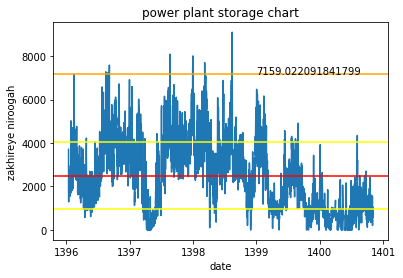

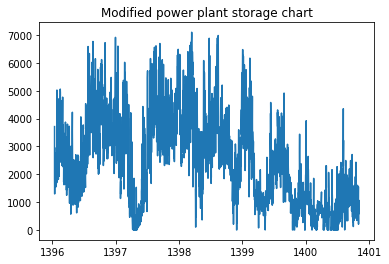

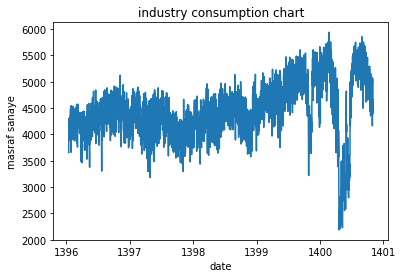

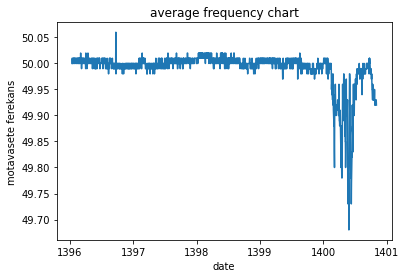

'\nهمانطور که مبیبنیم در همان بازه زمانی که خاموشی رخ داده است و شاهد نوسان در مصرف برق صنایع هستیم نوسان شدیدی\nدر مقدار فرکانس نیز رخ میدهد که با توجه به انطباق زمانی، این نوسان تا حدی طبیعی است و در نتیجه نیازی به اصلاح ندارد چون\nبا اتفاقات آن بازه ی زمانی سازگاری و تطابق دارد\n'

In [5]:
# oscillation => os # بخش 3
y = np.mean(d['p_reserve'])
Y1 = np.mean(d['p_reserve']) + np.std(d['p_reserve'])
Y2 = np.mean(d['p_reserve']) - np.std(d['p_reserve'])
m_3std = np.mean(d['p_reserve']) + 3*np.std(d['p_reserve'])
plt.plot(d['date_num'], d["p_reserve"])
plt.axhline(Y1, c = 'yellow')
plt.axhline(Y2, c = 'yellow')
plt.axhline(m_3std, c = 'orange')
plt.axhline(y, c = 'red')
plt.annotate(m_3std,(1399,m_3std))
plt.xlabel("date")
plt.ylabel('zakhireye niroogah') 
plt.title("power plant storage chart")
plt.show()
"""
C = میانگین - سه برابر انحراف معیار
D = میانگین + سه برابر انحراف معیار
با توجه به مشاهده ی نوسان ها، برای حذف مقادیر نامعقول، از پراکندگی داده ها حول میانگین استفاده کردیم.
البته که مقادیر کمتر از میانگین نیازی به بررسی و حذف ندارند زیرا با توجه یه صورت مسیله، طبیعی است که
در بعضی از روزها ذخیره ی نیروگاه ها بسیار کم و یا حتی صفر شود.از آنجا که ۹۹ درصد داده ها در بازه سی تا دی هستند
 ما برای حذف مقادیر نامعقول با توجه به نمودار، داده های بیشتر از دی را حذف کرده ایم.
"""
d = d[d['p_reserve'] < m_3std] # حذف داده های اضافی و نامعقول از ستون مصرف ذخیره نیروگاه ها طبق محاسبات بالا

plt.plot(d["date_num"],d["p_reserve"])
plt.title("Modified power plant storage chart")
plt.show() # نمودار پس از حذف مقادیر نامعقول


plt.plot(d["date_num"], d["p_industries"])
m_3std_industries = np.mean(d["p_industries"]) - 3*np.std(d["p_industries"])
plt.xlabel("date")
plt.ylabel('masraf sanaye')
plt.title("industry consumption chart")
plt.show()
"""
با توجه به این نمودار در نیمه اول سال ۱۴۰۰ یک نوسان غیر معمول مشاهده میشود.
اگر دقت کنیم این نوسان در زمانی رخ داده است که کشور با خاموشی رو به رو بوده
و قطعی برق باعث این کاهش چشمگیر شده است.اما این کاهش مصرف چون به دلیل جلوگیری از قطعی توسط دولت ایجاد شده است
در محاسبات ما طبیعی بوده و خطایی ایجاد نمیکند
"""

plt.plot(d["date_num"], d["freq_avg"])
plt.xlabel("date")
plt.ylabel('motavasete ferekans')
plt.title("average frequency chart")
plt.show()

"""
همانطور که مبیبنیم در همان بازه زمانی که خاموشی رخ داده است و شاهد نوسان در مصرف برق صنایع هستیم نوسان شدیدی
در مقدار فرکانس نیز رخ میدهد که با توجه به انطباق زمانی، این نوسان تا حدی طبیعی است و در نتیجه نیازی به اصلاح ندارد چون
با اتفاقات آن بازه ی زمانی سازگاری و تطابق دارد
"""


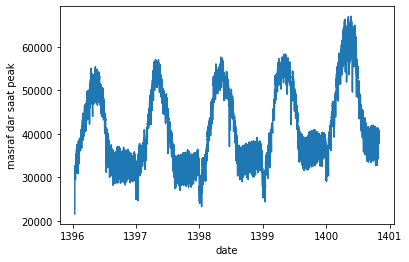

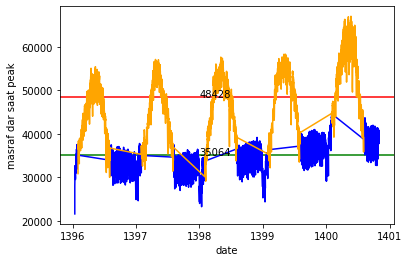

"\nنمودار نیاز مصرف در ساعات پیک رسم شد. معمولا و به طور میانگین از ماه آبان به بعد تا آخرین روزهای فروردین مردم شروع به\n استفاده از وسایل گرمایشی میکنند. برای فهم بیشتر و دقیقترِ تفاوت مصرف برق در روزهای سرد و گرم نمودار دیگری رسم کردیم که\nرنگ نارنجی نش اندهنده روز های گرم و شامل ماه اردیبهشت تا آخر مهر و رنگ آبی نشاندهنده روز های سرد و شامل ماه آبان تا آخر فروردین\n میباشد.میزان مصرف در روزهای سرد از 23000 تا 45000 مگاوات میباشد اما در روزهای گرم، از 29000 مگاوات شروع شده و\n به 67000 مگاوات میرسد. میانگینِ نیازِ مصرف در پیکِ روزهای کرم حدودا 14000 مگاوات بیشتر از روزهای سرد است\n این اختلافات، خود نشاندهنده اتکای کمتر گرمایش به برق نسبت به سرمایش میباشد. همچنین همانطور که در نمودار مشاهده میشود\nدر نزدیکیِ نیمه هر سال یعنی مرداد ماه که گرما به اوج خود میرسد مصرف برق نیز به بیشترین مقدار خود میرسد\nپس این جمله که 'در ایران سرمایش متکی به برق و گرمایش عمدتا متکی به گاز است' صحیح میباشد \nو الگوی تغییرات مصرف در پیک نیز این موضوع را تایید میکند\n"

In [6]:
# بخش 4
# زیر بخش ها 1 و 2 
plt.plot(d["date_num"], d["p"])
plt.xlabel("date")
plt.ylabel('masraf dar saat peak')
plt.show()
sarma = d[np.array(d["m"] >= 8) | np.array(d["m"] == 1)]
garma = d[np.array(d["m"] < 8) & np.array(d["m"] > 1)]
m_sarma = np.mean(sarma['p'])
m_garma = np.mean(garma['p'])

plt.axhline(m_garma, c = 'red')
plt.axhline(m_sarma, c = 'green')
plt.annotate(round(m_garma),(1398,m_garma))
plt.annotate(round(m_sarma),(1398,m_sarma))
plt.plot(sarma["date_num"], sarma["p"], c='blue')
plt.plot(garma["date_num"], garma["p"], c='orange')
plt.xlabel("date")
plt.ylabel('masraf dar saat peak')
plt.show()
"""
نمودار نیاز مصرف در ساعات پیک رسم شد. معمولا و به طور میانگین از ماه آبان به بعد تا آخرین روزهای فروردین مردم شروع به
 استفاده از وسایل گرمایشی میکنند. برای فهم بیشتر و دقیقترِ تفاوت مصرف برق در روزهای سرد و گرم نمودار دیگری رسم کردیم که
رنگ نارنجی نش اندهنده روز های گرم و شامل ماه اردیبهشت تا آخر مهر و رنگ آبی نشاندهنده روز های سرد و شامل ماه آبان تا آخر فروردین
 میباشد.میزان مصرف در روزهای سرد از 23000 تا 45000 مگاوات میباشد اما در روزهای گرم، از 29000 مگاوات شروع شده و
 به 67000 مگاوات میرسد. میانگینِ نیازِ مصرف در پیکِ روزهای کرم حدودا 14000 مگاوات بیشتر از روزهای سرد است
 این اختلافات، خود نشاندهنده اتکای کمتر گرمایش به برق نسبت به سرمایش میباشد. همچنین همانطور که در نمودار مشاهده میشود
در نزدیکیِ نیمه هر سال یعنی مرداد ماه که گرما به اوج خود میرسد مصرف برق نیز به بیشترین مقدار خود میرسد
پس این جمله که 'در ایران سرمایش متکی به برق و گرمایش عمدتا متکی به گاز است' صحیح میباشد 
و الگوی تغییرات مصرف در پیک نیز این موضوع را تایید میکند
"""

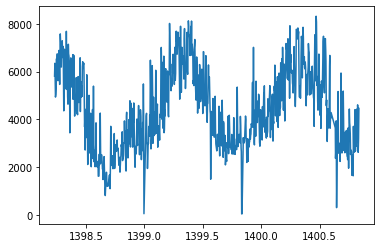

'  \nبا رسم نمودار اصلاح شده مشاهده میکنیم که تغییرات انرژی تولیدی نیروگاه های تجدید پذیر به طور منظم با تغییر فصول \nتغییر میکند و این میزان در تابستان به اوج خود میرسد و در اواسط زمستان مقادیر آن کاهش شدید پیدا میکند و خب دلیل آن\nکاهش نیروی تابش نور خورشید و بارندگی های بیشتر و ... میتواند باشد\n\nبا حذف خطاهای سیستمی در وارد کردن اطلاعات ، در میان تمام این داده ها باز بعضا نوسانات عجیبی را داریم که به طرز فاحشی\nمیزان تولید با نیروی تجدیدپذیر به شدت کاهش یافته که این نوسانات غیر معمول هستند و میتوانند ناشی از\nعدم صحت اطلاعات و یا خطای کارشناس مربوطه ، از مدار خارج شدن موقتی نیروگاه های تجدید پذیر ، اتفاقات و حوادث طبیعی و ... باشد\nپس میتوان گفت نوساناتی فراتر از الگوی تغییرات فصلی نیز در نمودار قابل مشاهده است که دلایل فرضی آن ذکر شد\n\nمجددا یادآوری میکنم که ما صرفا در این بخش سایر داده های قسمت تولید نیروگاه های تجدید پذیر را اصلاح کردیم\nچون حذف این مقدار از داده ها باعث ایجاد اشکال در محاسبات بعدی میشد\n'

In [7]:
# بخش 4 زیر بخش های 3 و 4
renew_data=d[d["p_renewable"]>0] #حذف مقادیر ثبت نشده که با صفر در جدول ثبت شده اند برای رسم نمودار دقیق تر 

# در خط زیر با فرمول سه برابر انحراف معیار با فاصله از میانگین مقادیر گزینش شده اند
renew_data=renew_data[np.array(renew_data["p_renewable"]>=np.mean(renew_data["p_renewable"])-3*np.std(renew_data["p_renewable"])) & np.array(renew_data["p_renewable"]<=np.mean(renew_data["p_renewable"]+3*np.std(renew_data["p_renewable"])))]
plt.plot(renew_data["date_num"], renew_data["p_renewable"])
plt.show()

"""  
با رسم نمودار اصلاح شده مشاهده میکنیم که تغییرات انرژی تولیدی نیروگاه های تجدید پذیر به طور منظم با تغییر فصول 
تغییر میکند و این میزان در تابستان به اوج خود میرسد و در اواسط زمستان مقادیر آن کاهش شدید پیدا میکند و خب دلیل آن
کاهش نیروی تابش نور خورشید و بارندگی های بیشتر و ... میتواند باشد

با حذف خطاهای سیستمی در وارد کردن اطلاعات ، در میان تمام این داده ها باز بعضا نوسانات عجیبی را داریم که به طرز فاحشی
میزان تولید با نیروی تجدیدپذیر به شدت کاهش یافته که این نوسانات غیر معمول هستند و میتوانند ناشی از
عدم صحت اطلاعات و یا خطای کارشناس مربوطه ، از مدار خارج شدن موقتی نیروگاه های تجدید پذیر ، اتفاقات و حوادث طبیعی و ... باشد
پس میتوان گفت نوساناتی فراتر از الگوی تغییرات فصلی نیز در نمودار قابل مشاهده است که دلایل فرضی آن ذکر شد

مجددا یادآوری میکنم که ما صرفا در این بخش سایر داده های قسمت تولید نیروگاه های تجدید پذیر را اصلاح کردیم
چون حذف این مقدار از داده ها باعث ایجاد اشکال در محاسبات بعدی میشد
"""


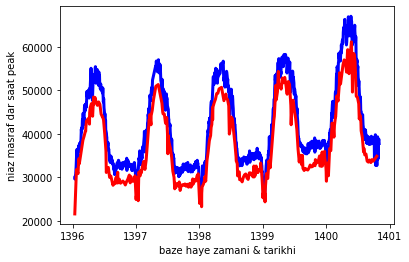

'\nهمان طور که در نمودار مشخص است\n تفاوت روز های تعطیل و غیر تعطیل تا حد خوبی قابل تشخیص است \n'

In [8]:
################################ قسمت چهارم <<< تلفیق داده ها و مقایسه اولیه ##############################
# بخش 1
df=d[d["h"]<16]
# بخش 2
df=df.pivot_table(index="date",aggfunc="max")
df=df.reset_index()
# بخش 3
d_cal=pd.read_excel(r"C:\Users\Digiyazd.com\Desktop\p-p1\python_project\persianCalendar.xlsx")
d_cal=d_cal[d_cal["date_pr"]<="1400/10/30"] # حذف تاریخ اضافی نسبت به جدولی که از وضعیت شبکه برق از سایت دریافت شده

#بخش 4
df = df.merge(d_cal ,  how='inner', left_on='date' , right_on='date_pr')
df = df.drop("date_pr",axis=1) # حذف ستون اضافی
#بخش 5

tatil=df[df['holiday_inCal']==1]
gheir_tatil=df[df['holiday_inCal']==0]
plt.plot(gheir_tatil['date_num'], gheir_tatil['p'] , color='blue',linewidth=3)
plt.plot(tatil['date_num'], tatil['p'] , color='red',linewidth=3)
plt.xlabel("baze haye zamani & tarikhi")
plt.ylabel('niaz masraf dar saat peak')
plt.show()
"""
همان طور که در نمودار مشخص است
 تفاوت روز های تعطیل و غیر تعطیل تا حد خوبی قابل تشخیص است 
"""

C:\Users\Digiyazd.com\AppData\Local\Temp/ipykernel_3904/640596772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['holiday_inCal'][(df['weekday_en']=='Thursday') & (df['holiday_inCal']!=1)] = 0.5 # تبدیل میزان تعطیلی پنجشنبه های کاری به نیم واحد
C:\Users\Digiyazd.com\AppData\Local\Temp/ipykernel_3904/640596772.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['holiday_inCal'][(df['m']==1) & (df['d'] <= 13)]=1   # تغییر مقدار تعطیلی 13 روز اول هر سال به یک
C:\Users\Digiyazd.com\AppData\Local\Temp/ipykernel_3904/640596772.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

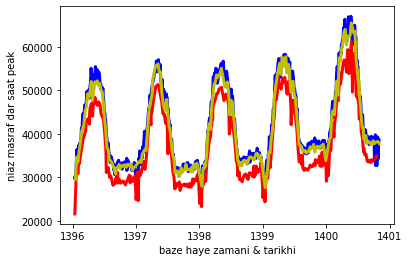

In [9]:
# بخش 6 و 7
df['holiday_inCal'][(df['weekday_en']=='Thursday') & (df['holiday_inCal']!=1)] = 0.5 # تبدیل میزان تعطیلی پنجشنبه های کاری به نیم واحد 
df['holiday_inCal'][(df['m']==1) & (df['d'] <= 13)]=1   # تغییر مقدار تعطیلی 13 روز اول هر سال به یک
df['holiday_inCal_tomorrow']=df['holiday_inCal'].shift(-1) # شیفت دادن ستون های جدول برای ایجاد ستون های خواسته شده
df['holiday_inCal_yesterday']=df['holiday_inCal'].shift(1)

df['holiday_inCal'][(df['holiday_inCal_yesterday']==1) & (df['holiday_inCal_tomorrow']==1) & (df['holiday_inCal']!=1) ] = 0.5

tatil=df[df['holiday_inCal']==1]
gheir_tatil=df[df['holiday_inCal']==0]
nime_tatil=df[df['holiday_inCal']==0.5]
plt.plot(gheir_tatil['date_num'], gheir_tatil['p'] , color='blue',linewidth=3)
plt.plot(tatil['date_num'], tatil['p'] , color='red',linewidth=3)
plt.plot(nime_tatil['date_num'], nime_tatil['p'] , color='y',linewidth=3)
plt.xlabel("baze haye zamani & tarikhi")
plt.ylabel('niaz masraf dar saat peak')
plt.show()

C:\Users\Digiyazd.com\AppData\Local\Temp/ipykernel_3904/3423993140.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['p_holiday_interpolated'][df['holiday_inCal']==1]=df["p"]
C:\Users\Digiyazd.com\AppData\Local\Temp/ipykernel_3904/3423993140.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['p_working_interpolated'][np.array(df['holiday_inCal']==0) | np.array(df['holiday_inCal']==0.5)]=df["p"]
C:\Users\Digiyazd.com\AppData\Local\Temp/ipykernel_3904/3423993140.py:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfm=df.groupby(["

     tarikh  Workday  Holiday  offices
mordad 1400    64377    55573     8803
#####################################################
       y   m  p_working_interpolated  p_holiday_interpolated  p_difference
0   1396   1            32966.026738            28199.000000   4767.026738
1   1396   2            39454.158730            34731.200000   4722.958730
2   1396   3            47162.733333            41425.500000   5737.233333
3   1396   4            51819.293718            45390.625000   6428.668718
4   1396   5            53371.127630            47360.000000   6011.127630
5   1396   6            49354.590323            43767.666667   5586.923656
6   1396   7            38372.130000            32479.833333   5892.296667
7   1396   8            33152.770408            28908.250000   4244.520408
8   1396   9            32775.339383            29666.800000   3108.539383
9   1396  10            32708.601587            28783.800000   3924.801587
10  1396  11            32937.049261       

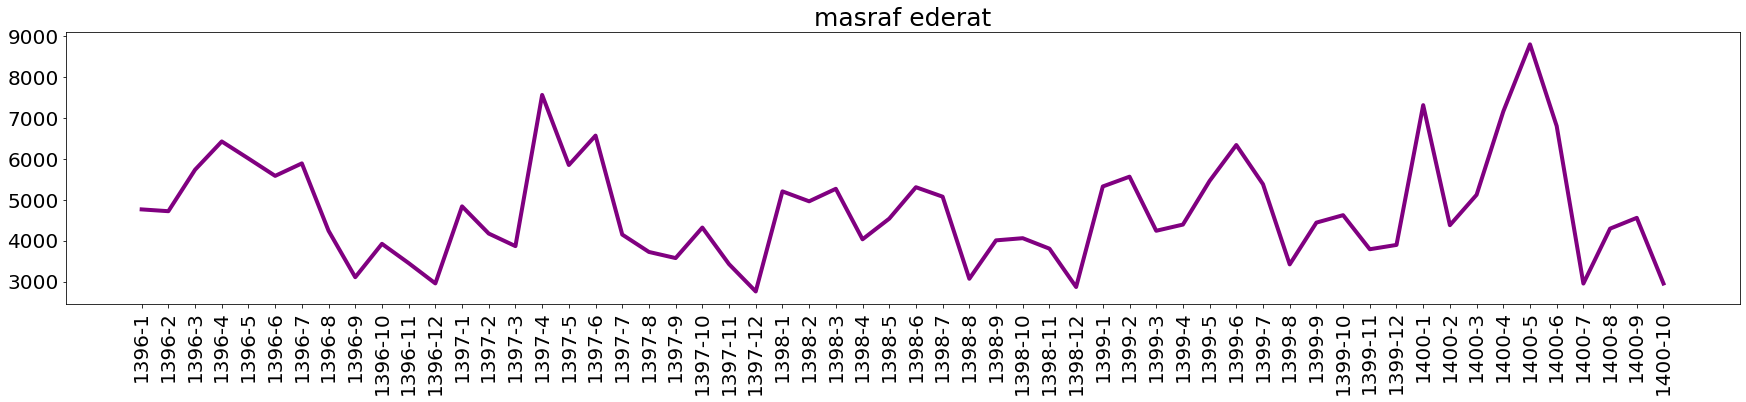

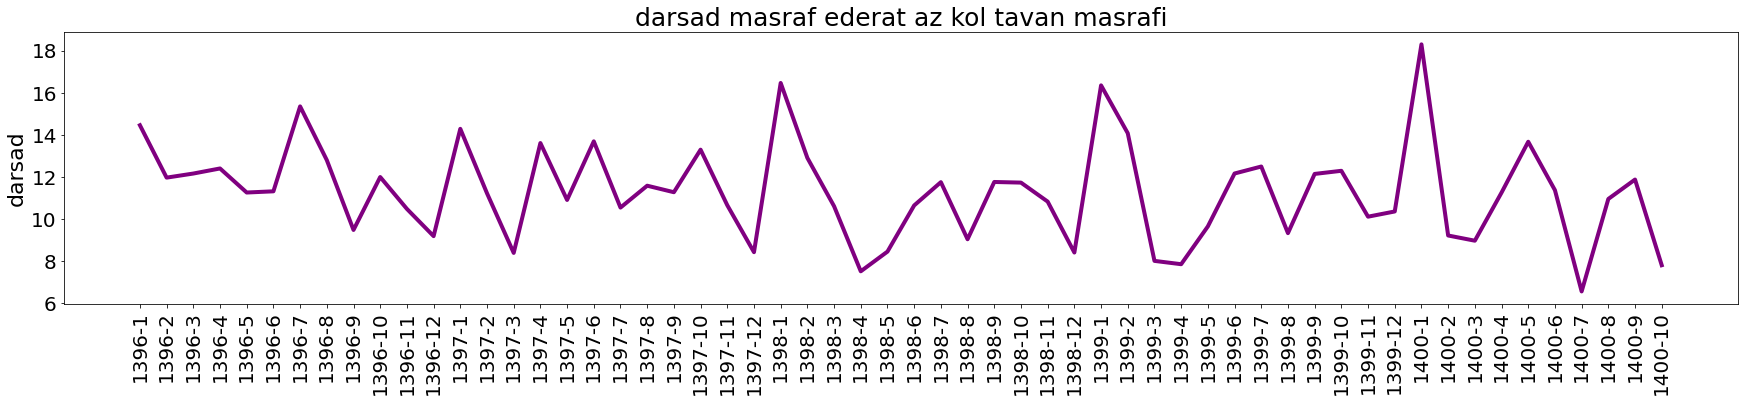

'\nبا توجه به نمودار میبینیم که تغییرات خاصی نداشتیم و این نسبت و درصد به طور منظم تکرار شده است و ناهماهنگی بزرگی به چشم نمیخورد \n'

In [10]:
######################### قسمت پنجم <<< مقایسه  مصرف روزهای تطیل و غیر تعطیل ###########################
# بخش 1
all_mean=df.groupby(["y","m","holiday_inCal"],as_index=False)["p"].agg("mean")
holiday_mean=all_mean[np.array(all_mean["holiday_inCal"]==1)].drop("holiday_inCal",axis=1)
holiday_mean.rename(columns={"p": 'p_holiday_interpolated'},inplace=True)
df=df.merge(holiday_mean,on=["y","m"])
df['p_holiday_interpolated'][df['holiday_inCal']==1]=df["p"]

workday_mean=all_mean[np.array(all_mean["holiday_inCal"]==0)].drop("holiday_inCal",axis=1)
workday_mean.rename(columns={"p": 'p_working_interpolated'},inplace=True)
df=df.merge(workday_mean,on=["y","m"])
df['p_working_interpolated'][np.array(df['holiday_inCal']==0) | np.array(df['holiday_inCal']==0.5)]=df["p"]
#  برای اینکه میزان توان مصرفی شبیه سازی شده ی روزهای کاری دقیق تر باشد دیگر روزهای با تعطیلی 0.5 را در محاسبات میانگین روزهای کاری لحاظ نکردیم تا اعداد دقیق تر باشند
"""
در اینجا برای درون یابی به جای استفاده از تابع درون یابی کتابخانه پانداس برای کنترل بیشتر و دقیق تر بودن خروجی ها 
درون یابی به صورت دستی صورت گرفته به طوری که ابتدا میانگین ماهانه روزهای کاری استخراج شده و به عنوان مقدار درون یابی شده ی
روزهای تعطیل قرار داده شده و همچنین میانگین روزهای تعطیل گرفته شده و برای درون یابی تعطیل بودن روزهای کاری در نظر گرفته شده
در نهایت مقدار درون یابی کاری برای روزهای کاری و نیمه تعطیل برابر مقدار خود توان آن روز و همچنین مقدار درون یابی تعطیلی برای
روزهای تعطیل نیز همان توان مصرفی آن روز تعطیل لحاظ شده است
"""
# بخش 2
dfm=df.groupby(["y","m"],as_index=False)["p_working_interpolated","p_holiday_interpolated"].agg("mean")

#بخش 3
dfm["p_difference"] = dfm["p_working_interpolated"] - dfm["p_holiday_interpolated"]

#بخش 4
mordad_1400 = dfm[np.array(dfm['y']==1400) & np.array(dfm['m']==5)]
names={'m': 'tarikh',"p_difference":"offices","p_working_interpolated":"Workday","p_holiday_interpolated":"Holiday"}
mordad_1400=mordad_1400.drop("y",axis=1).rename(columns=names)
mordad_1400["tarikh"]="mordad 1400"
mordad_1400[["offices","Workday","Holiday"]]=mordad_1400[["offices","Workday","Holiday"]].astype(int)
print(mordad_1400.to_string(index=False)) # پاسخ این بخش را در جدول پرینت شده میتوانید ملاحظه کنید
print("#####################################################")
print(dfm)
#بخش 5
dfm["ym_num"] = dfm["y"].astype(str)+"-"+dfm["m"].astype(str)  
fig = plt.figure(figsize=(30, 5))
ax = fig.add_subplot(111)
ax.plot(dfm["ym_num"], dfm["p_difference"], color="purple",linewidth=4)
plt.xticks(size=20,rotation=90)
plt.yticks(size=20)
plt.title("masraf ederat",size=25)
plt.show()



#بخش 6
fig = plt.figure(figsize=(30, 5))
ax = fig.add_subplot(111)
ax.plot(dfm["ym_num"], (dfm["p_difference"]/dfm["p_working_interpolated"])*100, color="purple",linewidth=4)
plt.xticks(size=20,rotation=90)
plt.yticks(size=20)
plt.title("darsad masraf ederat az kol tavan masrafi",size=25)
plt.ylabel("darsad",size=22)
plt.show()

"""
با توجه به نمودار میبینیم که تغییرات خاصی نداشتیم و این نسبت و درصد به طور منظم تکرار شده است و ناهماهنگی بزرگی به چشم نمیخورد 
"""


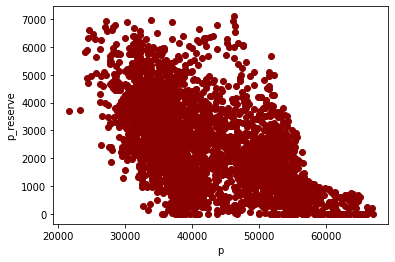

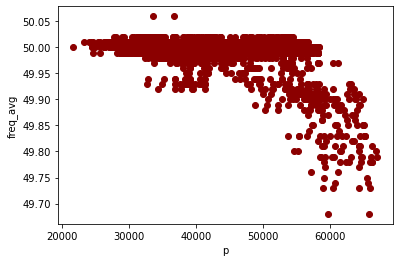

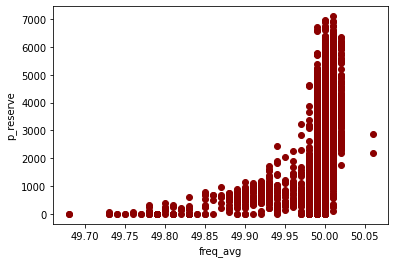

'\nطبق بررسی های انجام شده متوجه میشویم که دو مقدار فرکانس و مقدار ذخیره نیروگاه ها به طور مستقیم در قطعی و خاموشی نقش داشته و به صورت هماهنگ تغییر میکنند\nپس مواقعی که همزمان هم افت شدیدی در مقدار ذخیره نیروگاه ها و هم در فرکانس داشته ایم با درصد اطمینان بالاتری میتوانیم بگوییم که خاموشی و قطعی برق رخ داده\nپس این دوعامل برای بررسی خاموشی ها موثر و کارآمد هستند\n'

In [11]:
#################################### قسمت شش >>> خاموشی #############################
# بخش 1 
plt.scatter(d["p"], d["p_reserve"], c="darkred")
plt.xlabel("p")
plt.ylabel("p_reserve")
plt.show()
"""
همانطور که درنمودار نیز مشخص است میتوان به درست بودن صورت سوال پی برد و میبینیم که با افزایش مقدار توان مصرفی کل
مقدار ذخیره نیروگاه نیز کاهش یافته و مقادیر ذخیره نیروگاه بیشتر به صفر میل میکند
"""
# بخش 2 
plt.scatter(d["p"],d["freq_avg"], c="darkred")
plt.xlabel("p")
plt.ylabel("freq_avg")
plt.show()
"""
با توجه به نمودار در میابیم که هرچه توان مصرفی افزایش یافته احتمال افت فرکانس به دلیل مصرف زیاد و کمبود توان خروجی نیروگاه ها
بیشتر شده است و درصد زیادی از افت فرکانس ها مربوط به توان های مصرفی بالای 50000 مگاوات است
"""
# بخش 3 

plt.scatter(d["freq_avg"], d["p_reserve"], c="darkred")
plt.xlabel("freq_avg")
plt.ylabel("p_reserve")
plt.show()
"""
در تایید گزاره گفته شده میتوان گفت که با بررسی نمودار مشخص است که افت فرکانس عمدتا در مواقعی رخ داده است که مقدار ذخیره نیروگاه به
زیر 1000 مگاوات رسیده است که به خاطر افزایش شدید توان مصرفی بوده است
"""
"""
طبق بررسی های انجام شده متوجه میشویم که دو مقدار فرکانس و مقدار ذخیره نیروگاه ها به طور مستقیم در قطعی و خاموشی نقش داشته و به صورت هماهنگ تغییر میکنند
پس مواقعی که همزمان هم افت شدیدی در مقدار ذخیره نیروگاه ها و هم در فرکانس داشته ایم با درصد اطمینان بالاتری میتوانیم بگوییم که خاموشی و قطعی برق رخ داده
پس این دوعامل برای بررسی خاموشی ها موثر و کارآمد هستند
"""

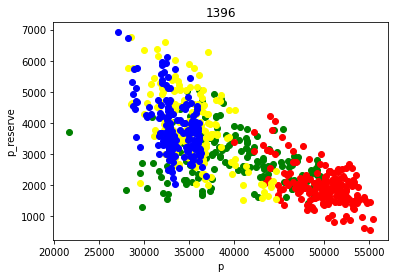

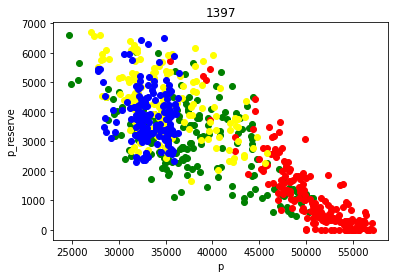

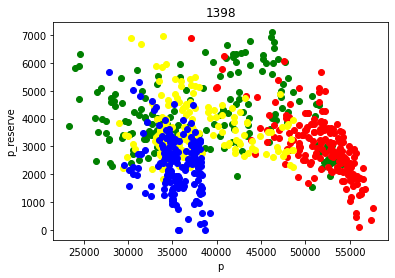

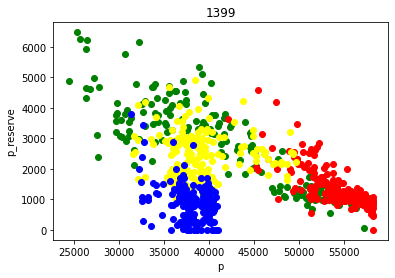

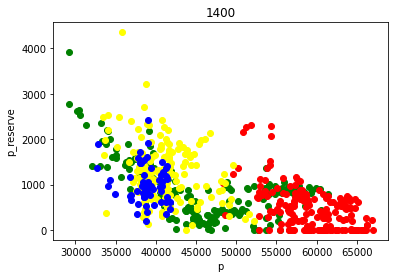

'\nدر فصل تابستان عمده مواقعی که مقدار ذخیره نیروگاه ها به صفر میرسد ، توان مصرفی بالای 50 هزار مگاوات است\nاما میبینیم که این اتفاق در فصل زمستان در مقدار توان مصرفی های خیلی کمتری رخ میدهد که از بازه ی 35 تا 40 هزارمگاوات هستند\nکه دلیل آن نیز این است که به دلیل مصرف زیاد گاز در زمستان در مصارف خانگی ، مقدار این سوخت فسیلی برای تولید برق\nکاهش میابد که در نتیجه توان تولیدی نیروگاه ها کاهش یافته و  زودتر توان مصرفی برق کشور به توان تولیدی نیروگاه ها و فراتر از آن میرسد\nبرای مقادیر توان مصرفی نیز سالانه درصدی رشد منظم را مشاهده میکنیم که به فرض سالانه میزان حداکثر توان مصرفی در تابستان 2 تا 5 درصد افزایش میابد \n'

In [12]:
# بخش 4

#bahar = 1, tabestun = 2, payiz = 3, zemestun = 4

d["s"] = d.m.apply(lambda x : (x//3.1)+1)

for sal in range(1396, 1401):
    for fasl in range(1, 5):
        
        x_p = d[(d.y == sal) & (d.s == fasl)]["p"]
        y_p = d[(d.y == sal) & (d.s == fasl)]["p_reserve"]

        if fasl == 1:
            color = "green"
        if fasl == 2:
            color = "red"
        if fasl == 3:
            color = "yellow"
        if fasl == 4:
            color = "blue"

        plt.scatter(x_p, y_p, c=color)

    plt.title(sal)
    plt.xlabel("p")
    plt.ylabel("p_reserve")

    plt.show()#برای هر سال ،مقدار ذخیره نیروگاه را بر حسب نیاز مصرف برق در پیک در هر فصل نمایش میدهد
################################
#رنگ سبز برای بهار ، رنگ قرمز برای تابستان ، رنگ زرد برای پاییز و رنگ آبی برای زمستان است
################################
"""
با مشاهده نمودار ها متوجه میشویم که نمودار ها از سال 1397 به بعد هرسال مقادیر صفر بیشتری برای مقدار ذخیره نیروگاه دارند
و این میزان در سال های 1398 و 1399 و 1400 بیشتر است که در سال 1400 دیگر به اوج خود میرسد و تعداد دفعات بیشتری در این سال مقدار 
ذخیره نیروگاه ها به صفر میرسد
"""
"""
عمده ی این مواقع که مقادیر ذخیره نیروگاه ها به صفر میرسد در فصل های تابستان و زمستان رخ میدهد
و بعضی مواقع در ماه های پایانی بهار نیز به دلیل گرمای زودهنگام ممکن است شاهد این اتفاق باشیم
اما عمدتا به دلیل باز زیاد مصرفی برق در تابستان و افزایش مصرف برق و گاز در زمستان شاهد به صرف رسیدن
این مقدار غالبا در این فصل ها هستیم
"""
"""
در فصل تابستان عمده مواقعی که مقدار ذخیره نیروگاه ها به صفر میرسد ، توان مصرفی بالای 50 هزار مگاوات است
اما میبینیم که این اتفاق در فصل زمستان در مقدار توان مصرفی های خیلی کمتری رخ میدهد که از بازه ی 35 تا 40 هزارمگاوات هستند
که دلیل آن نیز این است که به دلیل مصرف زیاد گاز در زمستان در مصارف خانگی ، مقدار این سوخت فسیلی برای تولید برق
کاهش میابد که در نتیجه توان تولیدی نیروگاه ها کاهش یافته و  زودتر توان مصرفی برق کشور به توان تولیدی نیروگاه ها و فراتر از آن میرسد
برای مقادیر توان مصرفی نیز سالانه درصدی رشد منظم را مشاهده میکنیم که به فرض سالانه میزان حداکثر توان مصرفی در تابستان 2 تا 5 درصد افزایش میابد 
"""

In [13]:
#Request_6_part_5_############################################################
d["widespread_off"] = 0
d["widespread_off"][(d["freq_avg"] < 49.99) & (d["p_reserve"] == 0)] = 1
"""
یک ستون جدید درست کردیم که با مقادیر صفر و یک نشان میدهدآیا خاموشی گسترده داشتیم یا نه
"""
#Request_6_part_6_############################################################
dm_widespread_off = d[d["widespread_off"] == 1].groupby(["y", "m"], as_index=False)["p"].agg(["min", "max"])
print(dm_widespread_off)
"""
میبینیم که که تیر ماه سال 1397 در رنج مقادیر 52922 تا 56468 مگاوات قطعی گسترده داشتیم 
و در مرداد ماه و دی ماه سال 1399 نیز قطعی گسترده داشتیم که رنج های آن در جدول چاپ شده مشخص هستند اما از داده های 
حاصل برای مرداد 1399 متوجه میشویم که تنها یک روز در این ماه قطعی داشتیم که توان مصرفی 58220 مگاوات بوده است
و نیز همچنین در اردیبهشت و خرداد و تیر و مرداد و شهریور و آبان  ماه سال 1400 نیز شاهد خاموشی گسترده و برقراری شرط گفته شده هستیم که رنج توان مصرفی در 
جدول چاپ شده مشخص است و با توجه به داده ها متوجه میشویم مجددا در آبان ماه 1400 نیز تنها در یک روز قطعی گسترده داشته ایم که توان مصرفی 43709 مگاوات
بوده است
"""

             min      max
y    m                   
1397 4   52922.0  56468.0
1399 5   58220.0  58220.0
     10  35816.0  41016.0
1400 2   52265.0  52745.0
     3   53747.0  55408.0
     4   61714.0  65918.0
     5   57119.0  67012.0
     6   52789.0  64953.0
     8   43709.0  43709.0


C:\Users\Digiyazd.com\AppData\Local\Temp/ipykernel_3904/2895062675.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["widespread_off"][(d["freq_avg"] < 49.99) & (d["p_reserve"] == 0)] = 1


'\nمیبینیم که که تیر ماه سال 1397 در رنج مقادیر 52922 تا 56468 مگاوات قطعی گسترده داشتیم \nو در مرداد ماه و دی ماه سال 1399 نیز قطعی گسترده داشتیم که رنج های آن در جدول چاپ شده مشخص هستند اما از داده های \nحاصل برای مرداد 1399 متوجه میشویم که تنها یک روز در این ماه قطعی داشتیم که توان مصرفی 58220 مگاوات بوده است\nو نیز همچنین در اردیبهشت و خرداد و تیر و مرداد و شهریور و آبان  ماه سال 1400 نیز شاهد خاموشی گسترده و برقراری شرط گفته شده هستیم که رنج توان مصرفی در \nجدول چاپ شده مشخص است و با توجه به داده ها متوجه میشویم مجددا در آبان ماه 1400 نیز تنها در یک روز قطعی گسترده داشته ایم که توان مصرفی 43709 مگاوات\nبوده است\n'

C:\Users\Digiyazd.com\AppData\Local\Temp/ipykernel_3904/409015514.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_kole_tolidi["tavan_tolidi"]=m_kole_tolidi["p"]+m_kole_tolidi["p_reserve"]


          date        p
0   1400/05/02  65010.0
1   1400/05/03  64891.0
2   1400/05/05  60675.0
3   1400/05/16  65107.0
4   1400/05/17  65692.0
5   1400/05/18  65933.0
6   1400/05/19  67012.0
7   1400/05/20  66119.0
8   1400/05/21  65493.0
9   1400/05/22  57119.0
10  1400/05/23  65834.0
11  1400/05/24  64785.0
12  1400/05/25  62671.0
###################################################


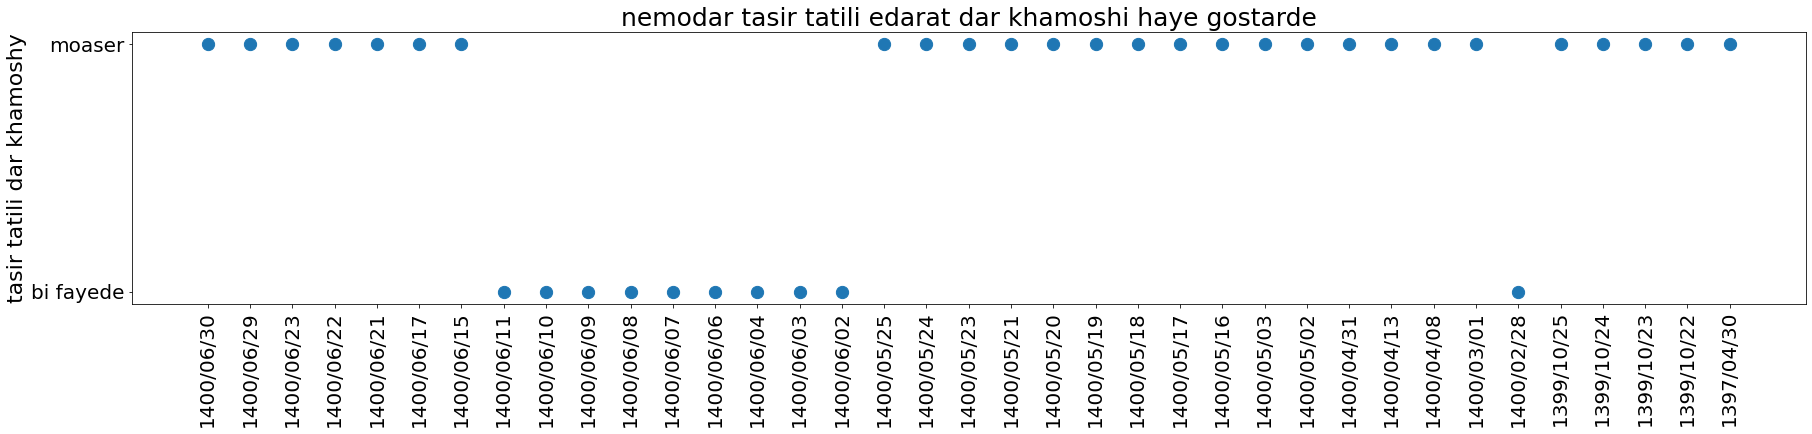

In [14]:
#Request_6_part_7_############################################################
#q1

off_md_1400 = d[(d["y"] == 1400) & (d["m"] == 5) & (d["widespread_off"] == 1)][["date","p"]]
off_md_1400_L=off_md_1400.groupby(["date"],as_index=False).agg("max")
print(off_md_1400_L)
"""
همانطور که در جدول چاپ شده نیز قابل مشاهده است ، در روزهای  2 ام و 3 ام و 5 ام و از 16 ام تا 25 ام مرداد
خاموشی گسترده رخ داده است
"""
#q2
m_kole_tolidi=d[d["p_reserve"] != 0]
m_kole_tolidi["tavan_tolidi"]=m_kole_tolidi["p"]+m_kole_tolidi["p_reserve"]
m_kole_tolidi=m_kole_tolidi.groupby(["y","m"],as_index=False)["tavan_tolidi"].agg("mean")

jadval_nahaei=d[(d["widespread_off"]==1) & (d["h"]<16)].merge(m_kole_tolidi,on=["y","m"])[["date","y","m","p","tavan_tolidi"]]
jadval_nahaei=jadval_nahaei.merge(dfm[["y","m","p_difference"]],on=["y","m"])
print("###################################################")
jadval_nahaei["jelogiri az khamoshi"]=(jadval_nahaei["p"]-jadval_nahaei["p_difference"]<=jadval_nahaei["tavan_tolidi"])
fig = plt.figure(figsize=(30, 5))
ax = fig.add_subplot(111)
ax.scatter(jadval_nahaei["date"],jadval_nahaei["jelogiri az khamoshi"],s=150)
plt.title("nemodar tasir tatili edarat dar khamoshi haye gostarde",size=25)
plt.ylabel("tasir tatili dar khamoshy",size=22)
plt.xticks(size=20,rotation=90)
plt.yticks(np.arange(2),("bi fayede","moaser"),size=20)
plt.show()

# در نمودار به تفکیک روزهایی که خاموشی گسترده داشته اند مشاهده میکنید که تعطیلی ادارات در پیش گیری از خاموشی موثر بوده اند یا نه
#با عناوین موثر و بی فایده ، اثر گذاری تعطیلی ادارات در پیش گیری از قطعی و خاموشی گسترده در نمودار بیان شده اند

         sum
y    m      
1397 4     2
1399 5     1
     10    8
1400 2     2
     3     2
     4     6
     5    21
     6    25
     8     1


C:\Users\Digiyazd.com\AppData\Local\Temp/ipykernel_3904/1622522120.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new_d=new_d.groupby(["y","m"],as_index=False)["p","p_renewable"].agg("mean")


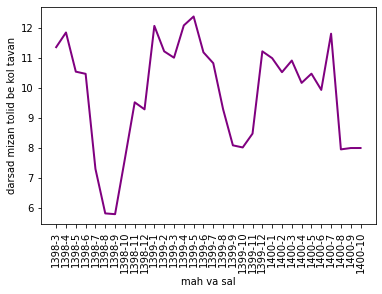

'\nمقادیر پرت و اضافی که صفر و ... بوده اند از نمودار حذف شدند و  در نهایت نمودار بر حسب تاریخ و میزان درصد تامین توان توسط نیروگاه های تجدیدپذیر\nرسم شده و همانطور که مشخص است نمودار الگوی سال به سال و فصلی نسبتا منظمی را طی کرده است ولی کمی رشد در هر سال برای همان تاریخ مشابه در سال قبل مشاهده میشود\nکه نمایانگر این است که درصد و نسبت توان تولیدی نیروگاه های تجدیدپذیر به توان مصرفی کل حفظ شده و حتی این نسبت افزایش نیز داشته است که میتوان گفت تا حدی\nنیروگاه های تجدیدپذیر خوب عمل کرده اند و نسبت توان تولیدی خود را در سطح مناسبی نگه داشته اند و نسبت توان تولیدی خود را به نسبت افزایش توان مصرفی افزایش داده اند که \nاین درصد ثابت مانده و یا بعضا افزایش نیز یافته است و در نهایت میتوان گفت نیورگاه های تجدید پذیر سهم خود را از توان تولیدی کشور در حد مناسبی نگه داشته اند\nاما شاید این میزان انقدر افزایش نداشته که افزایش خیلی زیاد توان مصرفی را بتواند پوشش بدهد اما به خودی خود نیروگاه های تجدید پذیر خوب عمل کرده اند\n'

In [15]:
################################# پرسش های بیشتر #################################
# سوال 1

gp_data = d.groupby(["y", "m"])["widespread_off"].agg(["sum"])

print(gp_data[gp_data["sum"] != 0].to_string()) #ماه هایی که حداقل یک روز خاموشی در آن داشتیم را میدهد
"""
در این قسمت ماه هایی که حداقل یک روز در آنها خاموشی گسترده داشته ایم را مشاهده میکنید که خب مشخصا متوجه میشویم
که در دی ماه سال 1399 و مرداد و شهریور ماه 1400 وضعیت کشور بحرانی بوده و قطعی ها و خاموشی های گسترده بسیار زیاد بودند
و این میزان به شدت زیادی در ماه های مردادو شهریور سال 1400 مشاهده میشود که 70 درصد و یا بیشتر از این میزان از روز های ماه را
خاموشی گسترده داشته ایم که نشانگیر وضعیت بحرانی شدیدی در این ماه ها میباشد
"""
#سوال 2
new_d=d[(d["p_renewable"]>0) & (d["p_renewable"]<10000)]
new_d=new_d.groupby(["y","m"],as_index=False)["p","p_renewable"].agg("mean")
new_d["date"]=new_d["y"].astype(str)+"-"+new_d["m"].astype(str)

plt.plot(new_d["date"],(new_d["p_renewable"]/new_d["p"])*100, c="purple",linewidth=2)
plt.xlabel("mah va sal")
plt.ylabel("darsad mizan tolid be kol tavan")
plt.xticks(rotation=90)
plt.show()# نمودار تولید نیروگاه های تجدید پذیر را بر حسب نیاز مصرف در پیک رسم میکند
"""
مقادیر پرت و اضافی که صفر و ... بوده اند از نمودار حذف شدند و  در نهایت نمودار بر حسب تاریخ و میزان درصد تامین توان توسط نیروگاه های تجدیدپذیر
رسم شده و همانطور که مشخص است نمودار الگوی سال به سال و فصلی نسبتا منظمی را طی کرده است ولی کمی رشد در هر سال برای همان تاریخ مشابه در سال قبل مشاهده میشود
که نمایانگر این است که درصد و نسبت توان تولیدی نیروگاه های تجدیدپذیر به توان مصرفی کل حفظ شده و حتی این نسبت افزایش نیز داشته است که میتوان گفت تا حدی
نیروگاه های تجدیدپذیر خوب عمل کرده اند و نسبت توان تولیدی خود را در سطح مناسبی نگه داشته اند و نسبت توان تولیدی خود را به نسبت افزایش توان مصرفی افزایش داده اند که 
این درصد ثابت مانده و یا بعضا افزایش نیز یافته است و در نهایت میتوان گفت نیورگاه های تجدید پذیر سهم خود را از توان تولیدی کشور در حد مناسبی نگه داشته اند
اما شاید این میزان انقدر افزایش نداشته که افزایش خیلی زیاد توان مصرفی را بتواند پوشش بدهد اما به خودی خود نیروگاه های تجدید پذیر خوب عمل کرده اند
"""


Season  y   
Autumn  1397     -251.567105
        1398     2630.935194
        1399     1599.879365
        1400     2213.380342
Spring  1396    -1252.231976
        1397    -1263.452284
        1398      501.533309
        1399     1808.843034
        1400     6364.619332
Summer  1396     3967.935484
        1397      477.187336
        1398      518.971337
        1399     2628.540252
        1400     7234.612903
Winter  1396   -29125.127957
        1397     -118.251852
        1398     2084.408201
        1399     2745.310317
        1400     1006.666667
Name: roshd_masraf, dtype: float64
####################### darsad_roshd_masraf ########################
Season  y   
Autumn  1397    -0.746053
        1398     7.237651
        1399     4.215694
        1400     5.510865
Spring  1396    -3.218137
        1397    -3.355939
        1398     1.314643
        1399     4.526790
        1400    13.739579
Summer  1396     7.889923
        1397     0.939930
        1398     1.011890
       

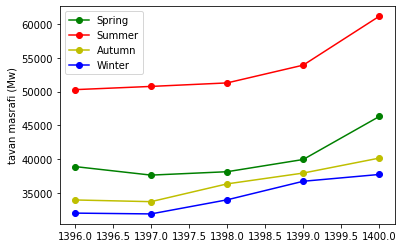

'\nبا ترسیم نمودار و همچنین با توجه به مقادیر بدست آمده از رشد مصرف برق محاسبه درصد رشد مصرف در هر فصل نسبت به فصل مشابه در سال قبل،\n متوجه میشویم بیشترین رشد مربوط به بهار سال 1399 و 1400 میباشد، که اختلاف بین این 2 سال حدود 6000 مگاوات و درصد رشد حدود 13% است.\n\n'

In [16]:
# سوال 3
# "d_s" ----> "d_season"
seasons = {1: 'Spring', 2:'Summer', 3:'Autumn', 4: 'Winter'}
d_s = df.groupby(['y', 'm'],as_index=False)["p"].agg("mean")
d_s['Season'] = (d_s)['m'].apply(lambda x: seasons[np.ceil(x/3)])
d_s = d_s.pivot_table( index=("Season",'y'))
d_s["roshd_masraf"] = d_s['p'].diff()
d_s = d_s.reset_index()
d_s = d_s.pivot_table( index=("Season",'y'))
d_s["darsad_roshd_masraf"] = (d_s["roshd_masraf"] / d_s['p'])*100

print(d_s['roshd_masraf'].dropna())
print("####################### darsad_roshd_masraf ########################")
print(d_s["darsad_roshd_masraf"].dropna())
#اطلاعاتی از سال 1395 در دست نیست پس میزان رشد و ... در سال 1396 قابل محاسبه نیست

X = d_s.loc['Spring'].index
plt.plot(X, d_s.loc['Spring']['p'], c='g', marker='o', label='Spring')
plt.plot(X, d_s.loc['Summer']['p'], c='r', marker='o', label='Summer')
plt.plot(X, d_s.loc['Autumn']['p'], c='y', marker='o', label='Autumn')
plt.plot(X, d_s.loc['Winter']['p'], c='b', marker='o', label='Winter')
plt.ylabel("tavan masrafi (Mw)")
plt.legend()
plt.show()

"""
با ترسیم نمودار و همچنین با توجه به مقادیر بدست آمده از رشد مصرف برق محاسبه درصد رشد مصرف در هر فصل نسبت به فصل مشابه در سال قبل،
 متوجه میشویم بیشترین رشد مربوط به بهار سال 1399 و 1400 میباشد، که اختلاف بین این 2 سال حدود 6000 مگاوات و درصد رشد حدود 13% است.

"""

In [17]:
# سوال 4 
df['date_gr'] = pd.to_datetime(df['date_gr'])
# تبدیل تاریخ سال میلادی و محدوده یابی آن در جدول دی
d_2017=d['p'][d['date_num'] <= 1396.78] 
p_2017=np.mean(np.array(d_2017))
d_2020=d['p'][(d['date_num'] >= 1398.79 ) & ( d['date_num'] <= 1399.78)]
p_2020=np.mean(np.array(d_2020))

d_2019=d['p'][(d['date_num'] <= 1398.78 ) & ( d['date_num'] >= 1397.79)]
p_2019=np.mean(np.array(d_2019))
d_2018=d['p'][(d['date_num'] >= 1397.78 ) & ( d['date_num'] <= 1399.79)]
p_2018=np.mean(np.array(d_2018))
d_2021=d['p'][(d['date_num'] >= 1399.79) & (d['p'].notnull()) ]
p_2021=np.mean(np.array(d_2021))
iran=pd.DataFrame( {'2017' : [round(p_2017,0)] ,
                    '2018' : [round(p_2018,0)] ,
                    '2019': [round(p_2019,0)] ,
                    '2020' :[round(p_2020,0)] ,
                    '2021' :[round(p_2021,0)] } , index=['Iran'] )
taghir_masraf_bargh=pd.DataFrame({'2017-2018':[ round(((p_2018 - p_2017)/ p_2017)*100,2)] ,
                                  '2018-2019':[round(((p_2019 - p_2018)/ p_2018)*100,2)],
                                  '2019-2020' : [round(((p_2020 - p_2019)/ p_2019)*100,2)],
                                   '2020-2021' : [round(((p_2021- p_2020)/ p_2020)*100,2)]} , index=['Iran'])
print(('taghir masraf bargh dar iran(2017-2021) :') ,round(((p_2021 - p_2017)/ p_2017)*100,2))
print(iran ,'\n')
print(taghir_masraf_bargh)
"""
بر اساس اطلاعات سایت ها مقدار مصرف برق در کشور های 
عراق وافغانستان و آذربایجان و پاکستان وعربستان و ترکیه 
 و بحرین و لبنان و قطر و ترکمنستان
تا سال 2019 یا 2020 موجود میباشد 
بر اساس سایت ها مقدار رشد جهانی نیز موجود است.
"""
#https://ourworldindata.org/grapher/per-capita-electricity-consumption?tab=table&time=2018..latest
#https://www.eia.gov/international/data/world/electricity/electricity-consumption?pd=2&p=0000002&u=0&f=A&v=mapbubble&a=-&i=none&vo=value&t=C&g=00000000000000000000000000000000000000000000000001&l=249-ruvvvvvfvtvnvv1vrvvvvfvvvvvvfvvvou20evvvvvvvvvvnvvvs0008&s=315532800000&e=1546300800000&
keshvar= pd.DataFrame({'Armenia' :[ -2 ] ,
          'Azerbaijan': [ +9],
          'Kazakhstan':[ +2] ,
          'Pakistan':[ +8] ,
          'Russia':[ -1] ,
          'Tajikistan':[ +4] ,
          'Turkey':[ -1] }) # از سال 2017 تا سال 2020
keshvar=keshvar.transpose()
keshvar.columns=['change']
print(keshvar)
world=pd.DataFrame({ 'world': ["6,238,888" ,"6,623,611" ,+6]}) # مقادیر به مگاوات تبدیل شده
world=world.transpose()
world.columns = [ 2017 ,2019 ,'change'] # داده های جهانی تا سال 2019 یافت شدند و بیشتر از آن موجود نبود
print(world)
# 
"""
با توجه به جدول های بالا مقدار تغییر مصرف برق در ایران از سال 2017 تا سال 2020 حدودا 2.35 درصد
 بیشتر شده است و رشد بیشتری از کشور های ارمنستان و قزاقستان و روسیه و ترکیه
 داشته است و از کشور های آذربایجان و پاکستان و تاجیکستان رشد کمتری داشته است
"""
"""
میانگین رشد توان مصرفی برق ایران از سال2017 تا 2021 حدودا ده درصد است .
"""

taghir masraf bargh dar iran(2017-2021) : 10.08
         2017     2018     2019     2020     2021
Iran  41752.0  41509.0  40545.0  42684.0  45962.0 

      2017-2018  2018-2019  2019-2020  2020-2021
Iran      -0.58      -2.32       5.28       7.68
            change
Armenia         -2
Azerbaijan       9
Kazakhstan       2
Pakistan         8
Russia          -1
Tajikistan       4
Turkey          -1
            2017       2019 change
world  6,238,888  6,623,611      6


'\nمیانگین رشد توان مصرفی برق ایران از سال2017 تا 2021 حدودا ده درصد است .\n'

In [18]:
# سوال 5
#منبع این قسمت 
#https://worldpopulationreview.com/country-rankings/energy-consumption-by-country
#https://yearbook.enerdata.net/electricity/electricity-domestic-consumption-data.html
"""
با توجه به سایتی که کامنت شده است: 
ایران از لحاظ مصرف برق در رتبه 64 در بین 140 کشور قرار گرفته است
که این یعنی ایران مصرف برق نسبتا زیادی دارد.ایران مصرف برق بالا تری
 از کشور هایی مانند پاکستان و عراق و تاجیکستان و ازبکستان 
 و ارمنستان و آذربایجان و ترکیه و ترکمنستان دارد.
اما کشور های عمان و روسیه و عربستان و امارات و قطر و بحرین 
مصرف برق بالا تری از ایران دارند .
(کشور های نامبرده کشورهای نزدیک ایران هستند)
"""

sum_2021=np.sum(d_2021)
sum_2020=np.mean(d_2020)
print(sum_2020/86000000)
"""
مصرف سرانه جهانی نیز 0.0078 مگاوات است که این عدد طبق محاسبات بالا برای ایران 0.0005 مگاوات است که با بررسی نسبت جمعیتی
نسبت به جمعیت جهانی متوجه میشویم که این مقدار برای ایران باید 0.011 مقدار سرانه جهانی یعنی 0.00008 مگاوات به ازای هر نفر باشد 
که میبینیم این مقدار برای ایران 6 برابر میانگین جهانی است
"""
"""
بر اساس اطلاعات ایران در سال 2021 , 86,022,837 است و طبق داده ها 
مقدار مصرفی برق در دنیا تقریبا برابر 220901 تراوات بر ساعت در سال 2020 بوده است 
و اگر جمعیت زمین را7,794,798,000 در نظر بگیریم
مقدار سرانه مرف برق در دنیا برابر 0.0078 مگاوات  می باشد.
"""


0.0004963293089229754


'\nبر اساس اطلاعات ایران در سال 2021 , 86,022,837 است و طبق داده ها \nمقدار مصرفی برق در دنیا تقریبا برابر 220901 تراوات بر ساعت در سال 2020 بوده است \nو اگر جمعیت زمین را7,794,798,000 در نظر بگیریم\nمقدار سرانه مرف برق در دنیا برابر 0.0078 مگاوات  می باشد.\n'

C:\Users\Digiyazd.com\AppData\Local\Temp/ipykernel_3904/1862793417.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_home = df.groupby(['y', 'm'],as_index=False)['p', 'p_industries'].agg('mean')


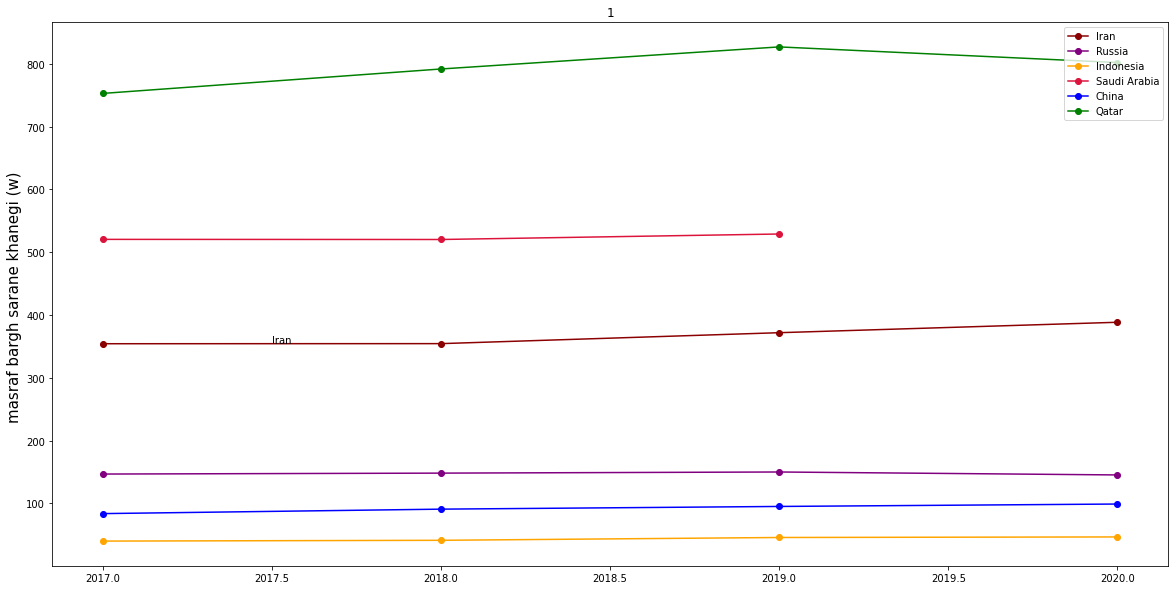

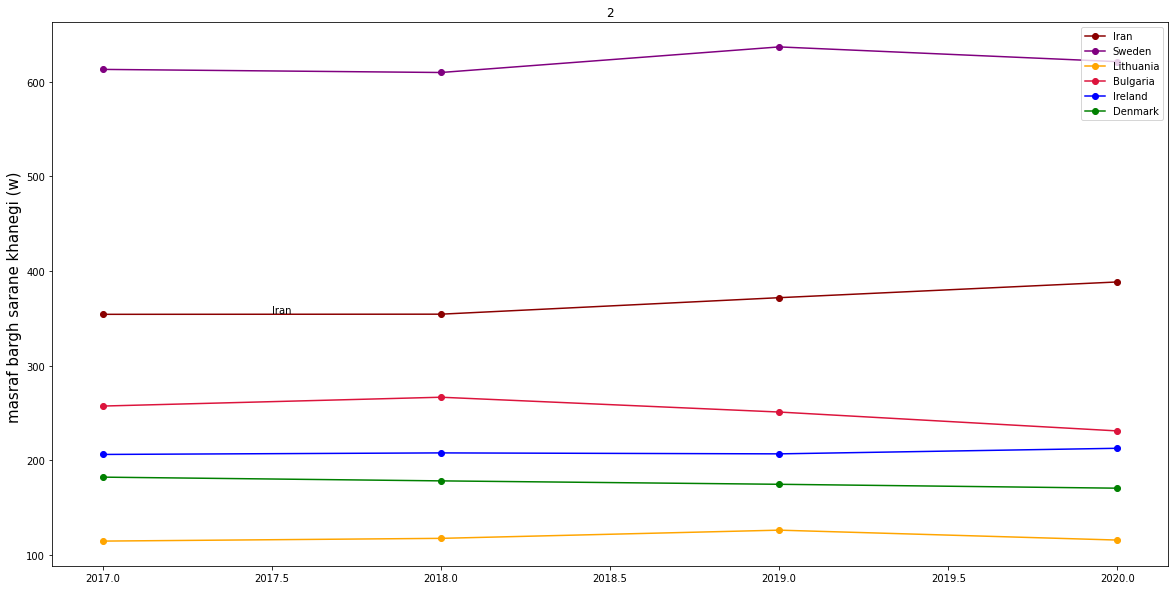

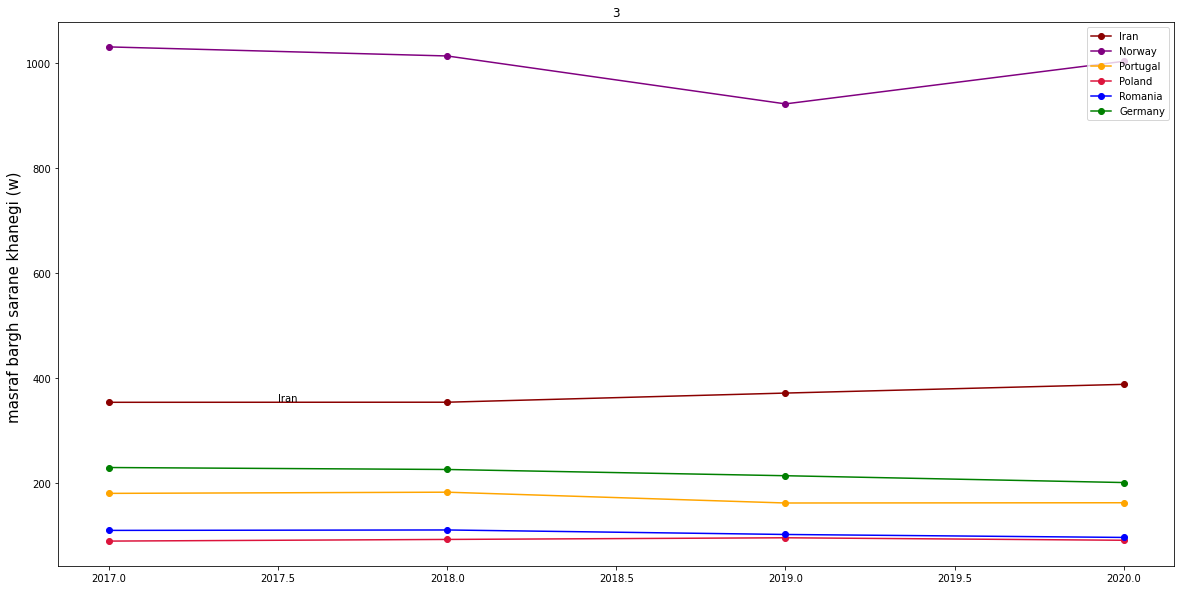

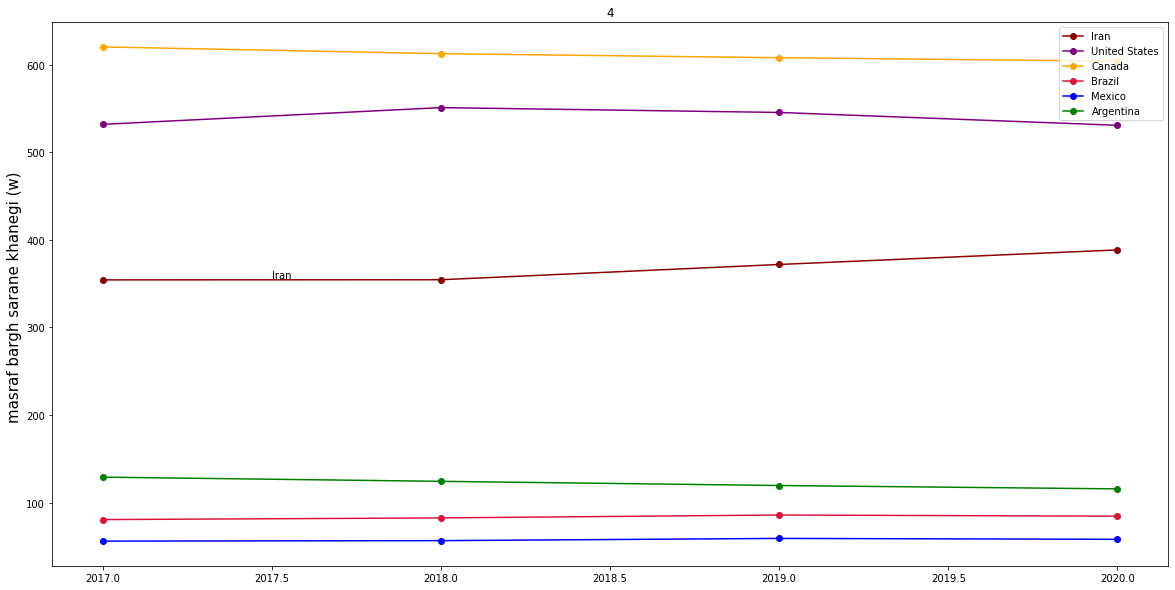

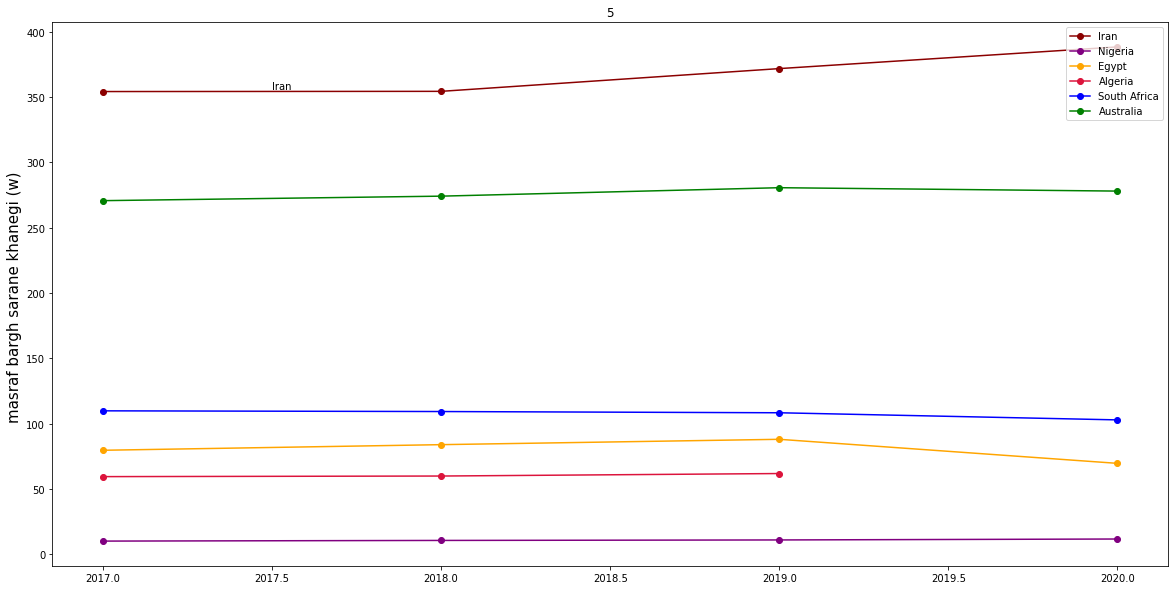

'\nبا توجه به اطلاعات بدست آمده از مراحل قبلی، مقدار مصرف خانگی در ایران را بدست آوردیم و سپس با مراجعه به منابع مختلف  میزان مصرف خانگی 25 کشور دیگه را نیز یافتیم.\nسپس با توجه به جمعیت هر کشور، توان مصرفی برق "سرانه" برای مصارف خانگی در ایران و سایر کشورها را محاسبه کردیم.\nدر هر نمودار توان مصرفی برق سرانه برای مصرف خانگی ایران و 5 کشور دیگر از قاره ای دیگر را رسم کردیم تا مقایسه خوبی بین ایران و دنیا داشته باشیم\n(نمودار1: آسیا، نمودار2و3: اروپا، نمودار4: آمریکا، نمودار5: آفریقا و استرالیا).\n در نمودا اول مشاهده میشود که توان مصرفی برق سرانه برای مصارف خانگی در ایران از کشورهای روسیه، چین، و اندونزی بیشتر\n و از کشورهای عربستان و فطر کمتر است. در نمودارهای 2و3 توان مصرفی برق سرانه برای مصارف خانگی در ایران از تمامی کشورهای اروپایی منتخب\n به جز سوئد , نروژ بیشتر است. در نمودار چهارم که مربوط به 5 کشور از قاره آمریکاست، مشاهده میشود توان مصرفی برق سرانه برای مصارف خانگی\n در کشورهای آرژانتین، مکزیک و برزیل از ایران کمتر و ایلات متخده و کانادا از ایزان بیشتر است. در نمودار پنجم \n ت

In [19]:
# سوال 6
df_home = df.groupby(['y', 'm'],as_index=False)['p', 'p_industries'].agg('mean')
df_home["p_offices"] = dfm["p_difference"]
df_home["p_homes"] = round(df_home['p'] - (df_home["p_offices"] + df_home['p_industries'])) # با کم کذدن مقادبر مصرف صنایع و مصرف ادارات از مصرف کل، میتوتنیم به تقریب خوبی از مصارف خانگی برسیم.

df_home = df_home.groupby('y').mean().reset_index().drop(index=4) # .هنگام بدست آوردن مصرف خانگی سایر کشورها، اطلاعات سال2021 در سایت ها موجود نبود
df_home["date_gr"] = [2017, 2018, 2019, 2020]

# "d_c" ----> "d_country"

d_c = pd.read_excel(r"C:\Users\Digiyazd.com\Desktop\p-p1\household consumption of electricity of other coutries.xlsx")
x= [2017, 2018, 2019, 2020]
k=1
for i in range(0,100,20):
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)
    plt.plot(x, df_home["p_homes"]/(84.1), c="darkred", marker='o', label="Iran")
    plt.annotate("Iran", (2017.5, 356))
    plt.plot(x, d_c["p_Residential consumption(MW)"][i:i+4]/d_c["Population(million)"][i], c='purple', marker='o', label=d_c["Country"][i])
    plt.plot(x, d_c["p_Residential consumption(MW)"][i+4:i+8]/d_c["Population(million)"][i+4], c='orange', marker='o', label=d_c["Country"][i+4])
    plt.plot(x, d_c["p_Residential consumption(MW)"][i+8:i+12]/d_c["Population(million)"][i+8], c='crimson', marker='o', label=d_c["Country"][i+8])
    plt.plot(x, d_c["p_Residential consumption(MW)"][i+12:i+16]/d_c["Population(million)"][i+12], c='b', marker='o', label=d_c["Country"][i+12])
    plt.plot(x, d_c["p_Residential consumption(MW)"][i+16:i+20]/d_c["Population(million)"][i+16], c='g', marker='o', label=d_c["Country"][i+16])
    plt.ylabel("masraf bargh sarane khanegi (w) ",size=15) # واحد محور عمودی وات است
    plt.title(k)
    plt.legend(loc='upper right')
    plt.show()
    k+=1
"""
با توجه به اطلاعات بدست آمده از مراحل قبلی، مقدار مصرف خانگی در ایران را بدست آوردیم و سپس با مراجعه به منابع مختلف  میزان مصرف خانگی 25 کشور دیگه را نیز یافتیم.
سپس با توجه به جمعیت هر کشور، توان مصرفی برق "سرانه" برای مصارف خانگی در ایران و سایر کشورها را محاسبه کردیم.
در هر نمودار توان مصرفی برق سرانه برای مصرف خانگی ایران و 5 کشور دیگر از قاره ای دیگر را رسم کردیم تا مقایسه خوبی بین ایران و دنیا داشته باشیم
(نمودار1: آسیا، نمودار2و3: اروپا، نمودار4: آمریکا، نمودار5: آفریقا و استرالیا).
 در نمودا اول مشاهده میشود که توان مصرفی برق سرانه برای مصارف خانگی در ایران از کشورهای روسیه، چین، و اندونزی بیشتر
 و از کشورهای عربستان و فطر کمتر است. در نمودارهای 2و3 توان مصرفی برق سرانه برای مصارف خانگی در ایران از تمامی کشورهای اروپایی منتخب
 به جز سوئد , نروژ بیشتر است. در نمودار چهارم که مربوط به 5 کشور از قاره آمریکاست، مشاهده میشود توان مصرفی برق سرانه برای مصارف خانگی
 در کشورهای آرژانتین، مکزیک و برزیل از ایران کمتر و ایلات متخده و کانادا از ایزان بیشتر است. در نمودار پنجم 
 توان مصرفی برق سرانه برای مصارف خانگی در ایران، از کشورهای منتخب آفریقایی و استرالیا بیشتر است.
 
 البته مقایسه مصرف برق سرانه (خانگی) میان کشورهای متفاوت با توجه به تفاوت موقعیت جغرافیایی نمی‌تواند تصویر دقیقی از این مسئله ایجاد نماید. به عنوان مثال
 قرارگیری 100 درصد جمعیت کشور قطر در موقعیت آب و هوایی حاشیه خلیج فارس و یا آب و هوای گرم و خشک عربستان، زمینه افزایش قابل توجه مصرف برق در حوزه تامین سرمایش را ایجاد می‌کند.
 بر این اساس مقایسه میزان مصرف برق کل در این کشورها با مصرف برق کل ایران با موقعیت‌های آب و هوایی گوناگون اساسا نمی تواند مقایسه صحیحی تلقی شود. از سوی دیگر برق
 تنها حامل انرژی تامین برق خانگی در بسیاری از کشورهای جهان تلقی شده و حامل‌های دیگر انرژی نظیر گاز در خانه‌ها مورد استفاده قرار نمی‌گیرد.
بر همین اساس، طبیعی است که میزان سرانه مصرف برق در این کشورها از سرانه مصرف برق در ایران فراتر باشد، زیرا در ایران علاوه بر مصرف برق،
 گاز نیز در جهت تامین انرژی گرمایش و پخت و پز مورد استفاده قرار می‌گیرد.
از همین رو سرانه مصرف برق خانگی با احتساب تامین سرمایش، روشنایی و تامین برق لوازم خانگی می‌تواند، تصویر دقیق‌تری از میزان مصرف برق توسط هر ایرانی و مقایسه
 با سایر کشورهای جهان ارائه دهد تا بدین وسیله میزان اسراف برق توسط پرمصرف‌های عمدتا ثروتمند به وضوح بیشتری مشخص شد.
با کمک "https://www.farsnews.ir/news/14001012000006"
"""    
